
#### 專題：以蒙地卡羅實驗驗證 J-B 檢定統計量
 1.令 \{$x_i$, i=1,$\cdots$, n\} 代表來自標準常態 N(0,1) 的 n 個隨機樣本。統計量 G_1 表示為
 $G_1 = \sqrt{\frac{n}{6}} \hat{s}$ 
 其中 $\hat{s}$ 為偏態係數（skewness）的估計值。請利用蒙地卡羅模擬（Monte Carlo Simulation）驗證統計量 G_1 服從標準常態 N(0,1)。其中蒙地卡羅模擬的環境設定（scenarios）為：
- 樣本數 n = 10, 20, 30, 50, 100, 300, 500, 1000。

- 針對每個樣本數 n，模擬次數皆為 N=50,000。

- 繪製 n = 10 與 n = 500 時，統計量 G_1 的直方圖與 ECDF 圖。並分別畫上對應的標準常態 PDF 與 CDF 圖。
 

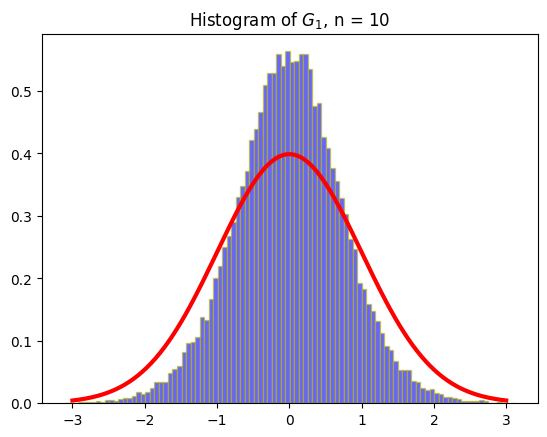

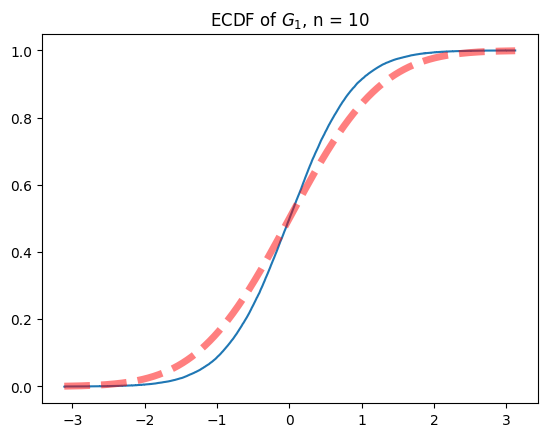

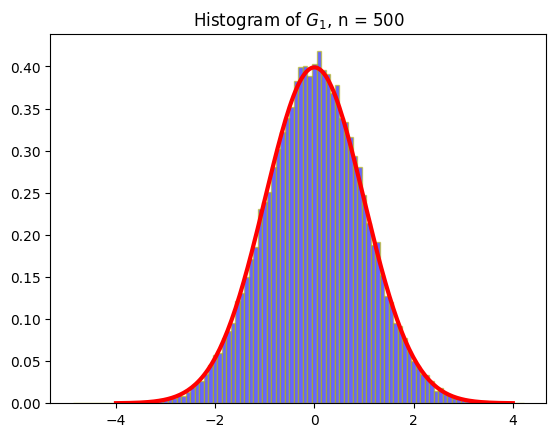

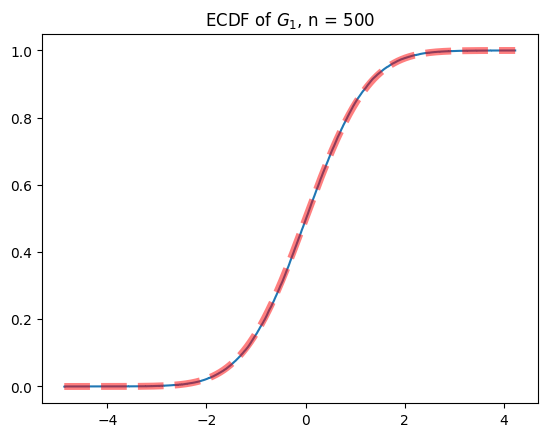

In [9]:
from scipy.stats import norm, skew, kurtosis,chi2,t
import numpy as np
import matplotlib.pyplot as plt

n = 10
N = 50000
x = norm.rvs(loc=0, scale=1, size= (n, N))
G1 = np.sqrt(n / 6) * skew(x)
plt.hist(G1,bins = 100, alpha = 0.6, color = "b", edgecolor = 'y', linewidth = 1,density=True)

xx = np.linspace(-3, 3, 200)
norm_pdf = norm.pdf(xx)
plt.plot(xx, norm_pdf, lw=3, color='r')
plt.title('Histogram of $G_1$, n = {}'.format(n))
plt.show()

xn=np.sort(G1)
yn=np.arange(1,len(G1)+1)/len(G1)
plt.plot(xn,yn,drawstyle='steps-pre')
plt.plot(xn,norm.cdf(xn),color='r',alpha=0.5,linestyle = '--',\
linewidth = 5)
plt.title('ECDF of $G_1$, n = {}'.format(n))
plt.show()


n = 500
N = 50000
x = norm.rvs(loc=0, scale=1, size= (n, N))
G1 = np.sqrt(n / 6) * skew(x)
plt.hist(G1,bins = 100, alpha = 0.6, color = "b", edgecolor = 'y', linewidth = 1,density=True)

xx = np.linspace(-4, 4, 200)
norm_pdf = norm.pdf(xx)
plt.plot(xx, norm_pdf, lw=3, color='r')
plt.title('Histogram of $G_1$, n = {}'.format(n))
plt.show()

xn=np.sort(G1)
yn=np.arange(1,len(G1)+1)/len(G1)
plt.plot(xn,yn,drawstyle='steps-pre')
plt.plot(xn,norm.cdf(xn),color='r',alpha=0.5,linestyle = '--',\
linewidth = 5)
plt.title('ECDF of $G_1$, n = {}'.format(n))
plt.show()





## 結論
 透過樣本數 10 和 500 的圖形比較，能清楚地看見樣本數 500 的分配較接近常態之PDF ，即可證明統計量 $G_1$ 在一定規模的樣本下會服從常態分配，常態之CDF也和我們設定的 $G_1$ 統計量產生之ECDF大致符合。
<hr>


2.同上，但令統計量為

$G_2 = \sqrt{\frac{n}{24}} (\hat{k} - 3)$ ，

其中 $\hat{k}$ 為峰態係數（Kurtosis）的估計值（參考指令 scipy.stats.kurtosis）。同樣利用蒙地卡羅模擬，驗證統計量 $G_2$ 服從標準常態 N(0,1)。蒙地卡羅模擬的環境設定同上。

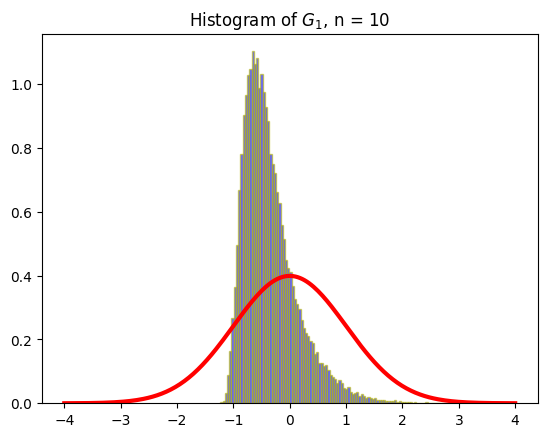

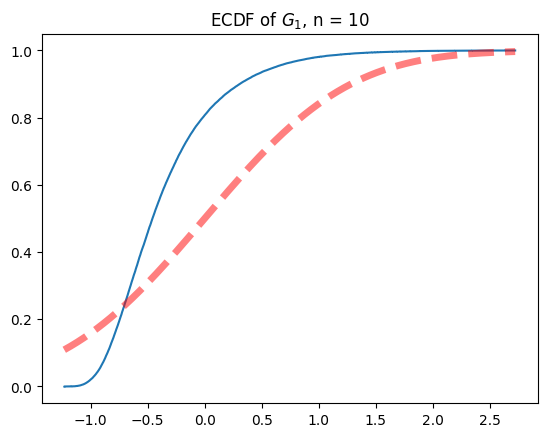

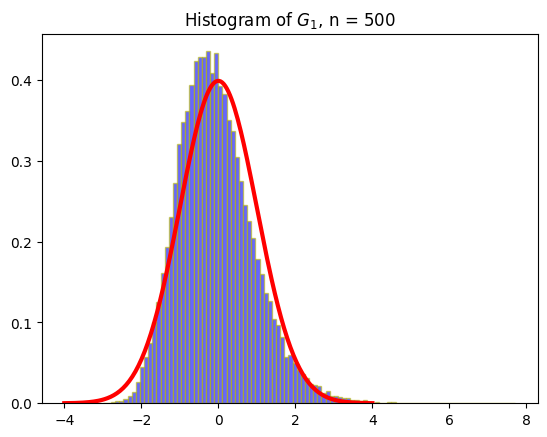

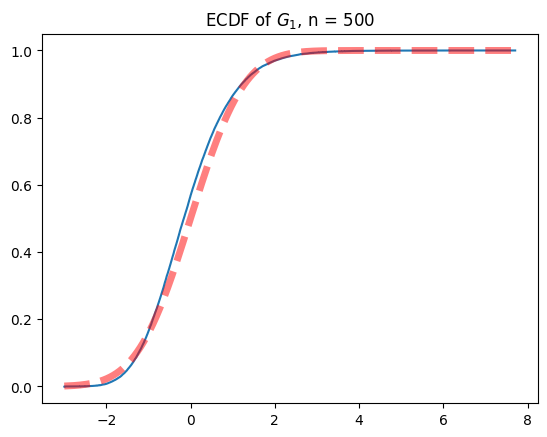

In [33]:
from scipy.stats import norm, skew, kurtosis,chi2,t
import numpy as np
import matplotlib.pyplot as plt

n = 10
N = 50000
X = norm.rvs(loc=0, scale=1, size= (n, N))
G2 = np.sqrt(n / 24) * kurtosis(X)
plt.hist(G2,bins = 100, alpha = 0.6, color = "b", edgecolor = 'y', linewidth = 1,density=True)

xx = np.linspace(-4, 4, 200)
norm_pdf = norm.pdf(xx)
plt.plot(xx, norm_pdf, lw=3, color='r')
plt.title('Histogram of $G_1$, n = {}'.format(n))
plt.show()

xn=np.sort(G2)
yn=np.arange(1,len(G2)+1)/len(G2)
plt.plot(xn,yn,drawstyle='steps-pre')
plt.plot(xn,norm.cdf(xn),color='r',alpha=0.5,linestyle = '--',\
linewidth = 5)
plt.title('ECDF of $G_1$, n = {}'.format(n))
plt.show()



n = 500
N = 50000
X = norm.rvs(loc=0, scale=1, size= (n, N))
G2 = np.sqrt(n / 24) * kurtosis(X)
plt.hist(G2,bins = 100, alpha = 0.6, color = "b", edgecolor = 'y', linewidth = 1,density=True)

xx = np.linspace(-4, 4, 200)
norm_pdf = norm.pdf(xx)
plt.plot(xx, norm_pdf, lw=3, color='r')
plt.title('Histogram of $G_1$, n = {}'.format(n))
plt.show()

xn=np.sort(G2)
yn=np.arange(1,len(G2)+1)/len(G2)
plt.plot(xn,yn,drawstyle='steps-pre')
plt.plot(xn,norm.cdf(xn),color='r',alpha=0.5,linestyle = '--',\
linewidth = 5)
plt.title('ECDF of $G_1$, n = {}'.format(n))
plt.show()



#### 結論:
 透過樣本數 10 和 500 的圖形比較，能清楚地看見樣本數 500 的分配較接近常態之PDF 。得知G1統計量跟G2統計量在樣本數夠大時皆符合常態。
<hr>

3.同上，但統計量為

$G_3 = G_1^2 + G_2^2 = \sqrt{\frac{n}{6}} \left(\hat{s}^2 +\frac{(\hat{k} - 3)^2}{4}\right)$ ，

同樣利用上述的蒙地卡羅模擬，驗證統計量 $G_3$ 服從卡方分配 $\chi^2(2)$。$G_3$ 為著名的 J-B (Jarque-Bera) 常態檢定統計量。

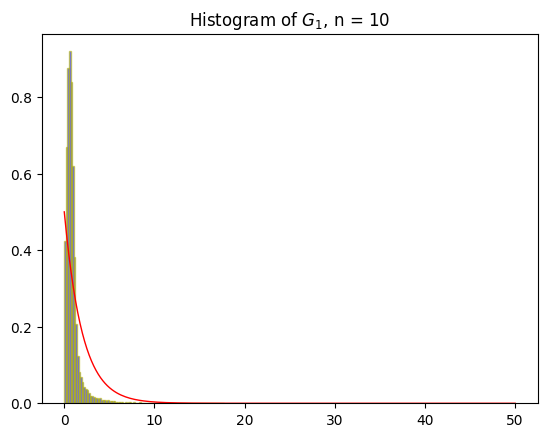

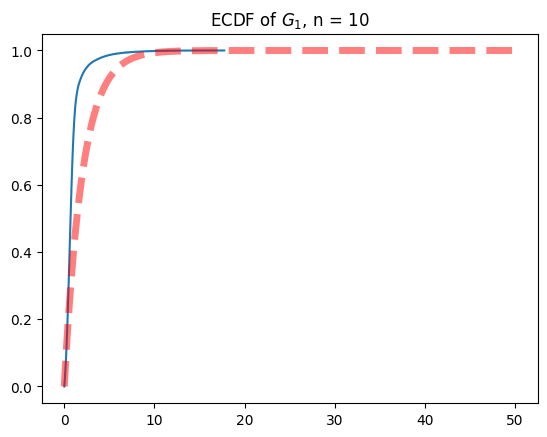

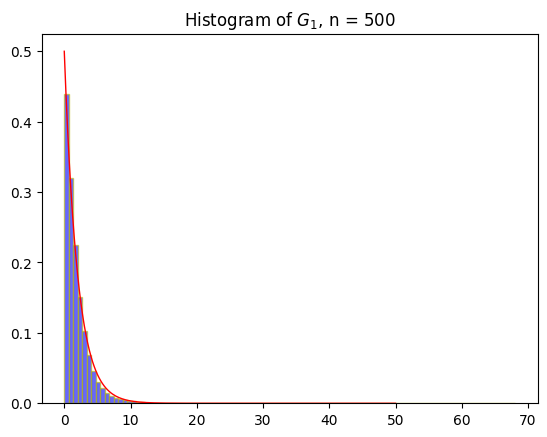

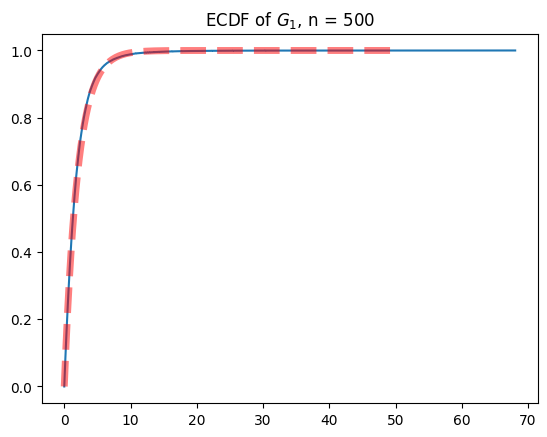

In [2]:
from scipy.stats import norm, skew, kurtosis,chi2,t
import numpy as np
import matplotlib.pyplot as plt

n = 10
N = 50000
X = norm.rvs(loc=0, scale=1, size= (n, N))
G1 = np.sqrt(n / 6) * skew(X)
G2 = np.sqrt(n / 24) * kurtosis(X)
G3 = G1**2 + G2**2
plt.hist(G3,bins = 100, alpha = 0.6, color = "b", edgecolor = 'y', linewidth = 1,density=True)

xx = np.linspace(0, 50, 200)
chi_pdf = chi2.pdf(xx, df = 2)
plt.plot(xx, chi_pdf, lw=1, color='r')
plt.title('Histogram of $G_1$, n = {}'.format(n))
plt.show()

xn=np.sort(G3)
yn=np.arange(1,len(G3)+1)/len(G3)
plt.plot(xn,yn,drawstyle='steps-pre')
plt.plot(xx,chi2.cdf(xx, df = 2),color='r',alpha=0.5,linestyle = '--',\
linewidth = 5)
plt.title('ECDF of $G_1$, n = {}'.format(n))
plt.show()


n = 500
N = 50000
X = norm.rvs(loc=0, scale=1, size= (n, N))
G1 = np.sqrt(n / 6) * skew(X)
G2 = np.sqrt(n / 24) * kurtosis(X)
G3 = G1**2 + G2**2
plt.hist(G3,bins = 100, alpha = 0.6, color = "b", edgecolor = 'y', linewidth = 1,density=True)

xx = np.linspace(0, 50, 200)
chi_pdf = chi2.pdf(xx, df = 2)
plt.plot(xx, chi_pdf, lw=1, color='r')
plt.title('Histogram of $G_1$, n = {}'.format(n))
plt.show()

xn=np.sort(G3)
yn=np.arange(1,len(G3)+1)/len(G3)
plt.plot(xn,yn,drawstyle='steps-pre')
plt.plot(xx,chi2.cdf(xx, df = 2),color='r',alpha=0.5,linestyle = '--',\
linewidth = 5)
plt.title('ECDF of $G_1$, n = {}'.format(n))
plt.show()


#### 結論
 根據上述兩題的結論，$G_1$ 和 $G_2$ 皆是常態分配，然而兩項平方相加(G3統計量)即為自由度為 2 的卡方分配，一樣地透過樣本數10跟500比較，能看見 $G_3$ 統計量之分配樣本數越大越接近卡方分配。
<hr>

 #### 4.
將上述驗證程式改寫為一個副程式，假設取名為 stats, p_value = JB_test(x)，輸入參數 x 代表欲檢定是否為常態的一組資料。 輸出兩個結果，stats 為 G_3 檢定統計量的值，p_value 為檢定的 p-value。

In [4]:
from scipy.stats import norm, skew, kurtosis,chi2,t
import numpy as np
def JB_test(x):
    n = x.shape[0]
    s1 = skew(x,bias=False)
    g1 = np.sqrt(n/6)*s1
    k1 = kurtosis(x,bias = False)
    g2 = np.sqrt(n/24)*(k1)
    stats = g1**2+g2**2
    p_value = 1-chi2.cdf(stats,df = 2)
    return stats, p_value

#### 5
接著檢驗檢定統計量 $G_3$ 的檢定力。採蒙地卡羅模擬方式，步驟如下：

- 從下列的分配母體中抽樣：$N(0,1)$, $T(3)$, $T(10)$, $T(30)$, $U(0,1)$, $\chi^2(8)$。

- 抽樣數 n=10, 20, 30, 50, 100, 300, 500。

- 實驗次數 N = 50000。

- 型一誤 $\alpha$ = 0.05。

- 對每個分配母體與樣本數，分別計算檢定力： Power = $P(Reject \; H_0 \;|\; H_a)$，其中 $H_0$: 資料來自常態；$H_a$: 資料來自其他分配。 最後針對每個母體，繪製如下圖的 Power vs. sample size。觀察檢定力受樣本數與母體來源（與常態的相似度）的影響。其中 Y 軸必須選擇合適的範圍，方能呈現出清楚的 power 值。



C:\Users\3hhsi\AppData\Local\Temp\ipykernel_15616\884050925.py:29: MatplotlibDeprecationWarning: Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.ylim(0.03, 0.075, 0.005)


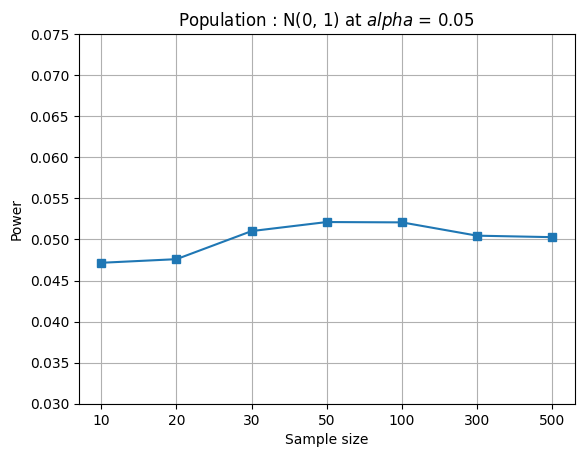

In [7]:
# N(0,1)
from scipy.stats import norm, skew, kurtosis,chi2,t
import numpy as np
import matplotlib.pyplot as plt
n = [10,20,30,50,100,300,500] #樣本數
N = 50000 #實驗次數
alfa = 0.05
mu = 0
s = 1
power = np.zeros(len(n))  

def JB_test(x):
    n = x.shape[0]
    s1 = skew(x,bias=False)
    g1 = np.sqrt(n/6)*s1
    k1 = kurtosis(x,bias = False)
    g2 = np.sqrt(n/24)*(k1)
    stats = g1**2+g2**2
    p_value = 1-chi2.cdf(stats,df = 2)
    return stats, p_value
#-------------------------------- 使用迴圈計算不同驗本下的檢定力
for i in range(len(n)):
    x = norm.rvs(loc = mu, scale = s, size = (n[i], N))
    stats, p_value = JB_test(x)
    power[i] = (p_value <= alfa).mean()
#---------------------------------畫圖
plt.plot(np.arange(len(n)), power, marker = "s")
plt.xticks(range(len(n)),n)    # make values turn to samples
plt.ylim(0.03, 0.075, 0.005)
plt.title("Population : N(0, 1) at $alpha$ = 0.05")
plt.xlabel("Sample size")
plt.ylabel("Power")
plt.grid()


C:\Users\3hhsi\AppData\Local\Temp\ipykernel_15616\3419129392.py:28: MatplotlibDeprecationWarning: Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.ylim(0, 1.1,  0.2)


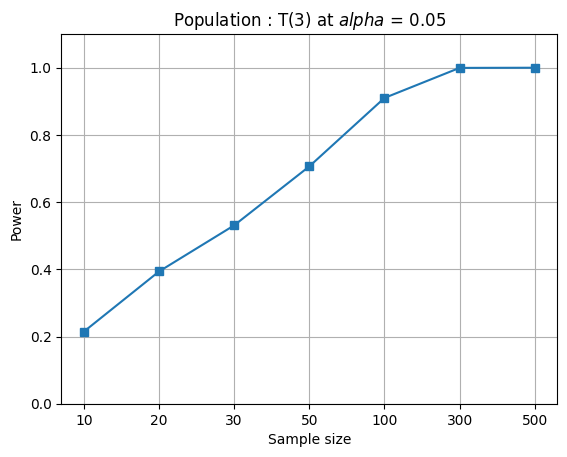

In [8]:
# T(3)
from scipy.stats import norm, skew, kurtosis,chi2,t
import numpy as np
import matplotlib.pyplot as plt
n = [10,20,30,50,100,300,500] #樣本數
N = 50000 #實驗次數
alfa = 0.05
power = np.zeros(len(n))  

def JB_test(x):
    n = x.shape[0]
    s1 = skew(x,bias=False)
    g1 = np.sqrt(n/6)*(s1)
    k1 = kurtosis(x,bias = False)
    g2 = np.sqrt(n/24)*(k1)
    stats = g1**2+g2**2
    p_value = 1-chi2.cdf(stats,df = 2)
    return stats, p_value
    
#-------------------------------- 使用迴圈計算不同驗本下的檢定力
for i in range(len(n)):
    x = t.rvs(df=3, size = (n[i], N))
    stats, p_value = JB_test(x)
    power[i] = (p_value <= alfa).mean()
#---------------------------------畫圖
plt.plot(range(len(n)), power, marker = "s") 
plt.xticks(range(len(n)),n)    # make values turn to samples
plt.ylim(0, 1.1,  0.2)
plt.title("Population : T(3) at $alpha$ = 0.05")
plt.xlabel("Sample size")
plt.ylabel("Power")
plt.grid()

C:\Users\3hhsi\AppData\Local\Temp\ipykernel_15616\3556328750.py:28: MatplotlibDeprecationWarning: Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.ylim(0, 1.1,  0.2)


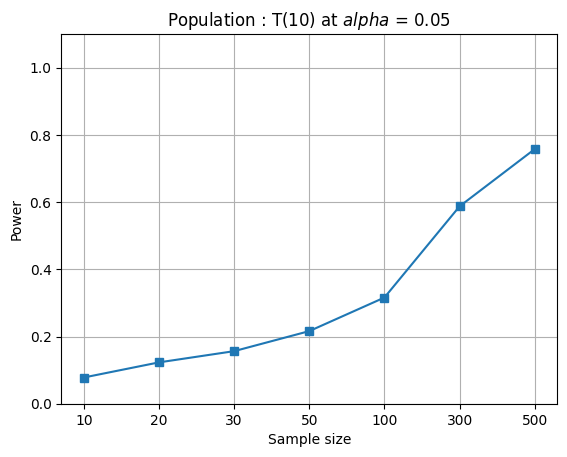

In [9]:
# T(10)
from scipy.stats import norm, skew, kurtosis,chi2,t
import numpy as np
import matplotlib.pyplot as plt
n = [10,20,30,50,100,300,500] #樣本數
N = 50000 #實驗次數
alfa = 0.05
power = np.zeros(len(n))  

def JB_test(x):
    n = x.shape[0]
    s1 = skew(x,bias=False)
    g1 = np.sqrt(n/6)*(s1)
    k1 = kurtosis(x,bias = False)
    g2 = np.sqrt(n/24)*(k1)
    stats = g1**2+g2**2
    p_value = 1-chi2.cdf(stats,df = 2)
    return stats, p_value
    
#-------------------------------- 使用迴圈計算不同驗本下的檢定力
for i in range(len(n)):
    x = t.rvs(df=10, size = (n[i], N))
    stats, p_value = JB_test(x)
    power[i] = (p_value <= alfa).mean()
#---------------------------------畫圖
plt.plot(range(len(n)), power, marker = "s") 
plt.xticks(range(len(n)),n)    # make values turn to samples
plt.ylim(0, 1.1,  0.2)
plt.title("Population : T(10) at $alpha$ = 0.05")
plt.xlabel("Sample size")
plt.ylabel("Power")
plt.grid()

C:\Users\3hhsi\AppData\Local\Temp\ipykernel_15616\3381128383.py:27: MatplotlibDeprecationWarning: Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.ylim(0, 0.3,  0.05)


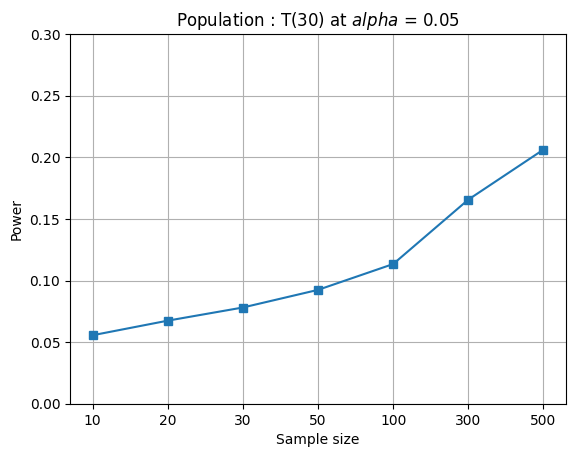

In [10]:
# T(30)
from scipy.stats import norm, skew, kurtosis,chi2,t
import numpy as np
import matplotlib.pyplot as plt
n = [10,20,30,50,100,300,500] #樣本數
N = 50000 #實驗次數
alfa = 0.05
power = np.zeros(len(n))  
def JB_test(x):
    n = x.shape[0]
    s1 = skew(x,bias=False)
    g1 = np.sqrt(n/6)*(s1)
    k1 = kurtosis(x,bias = False)
    g2 = np.sqrt(n/24)*(k1)
    stats = g1**2+g2**2
    p_value = 1-chi2.cdf(stats,df = 2)
    return stats, p_value
    
#-------------------------------- 使用迴圈計算不同驗本下的檢定力
for i in range(len(n)):
    x = t.rvs(df=30, size = (n[i], N))
    stats, p_value = JB_test(x)
    power[i] = (p_value <= alfa).mean()
#---------------------------------畫圖
plt.plot(range(len(n)), power, marker = "s") 
plt.xticks(range(len(n)),n)    # make values turn to samples
plt.ylim(0, 0.3,  0.05)
plt.title("Population : T(30) at $alpha$ = 0.05")
plt.xlabel("Sample size")
plt.ylabel("Power")
plt.grid()

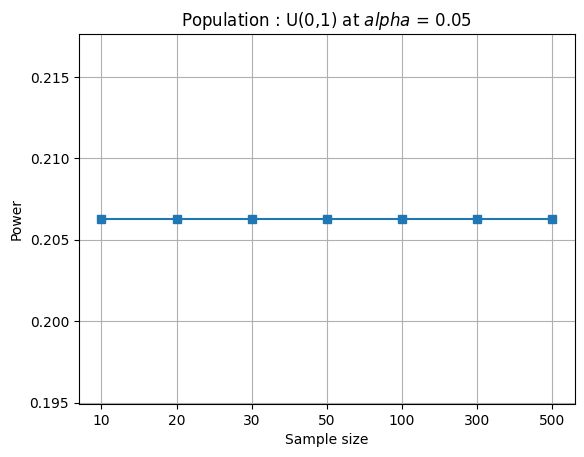

In [11]:
# U(0,1)
from scipy.stats import norm, skew, kurtosis,chi2,t,uniform
import numpy as np
import matplotlib.pyplot as plt
n = [10,20,30,50,100,300,500] #樣本數
N = 50000 #實驗次數
alfa = 0.05
power = np.zeros(len(n))  
def JB_test(x):
    n = x.shape[0]
    s1 = skew(x,bias=False)
    g1 = np.sqrt(n/6)*(s1)
    k1 = kurtosis(x,bias = False)
    g2 = np.sqrt(n/24)*(k1)
    stats = g1**2+g2**2
    p_value = 1-chi2.cdf(stats,df = 2)
    return stats, p_value
    
#-------------------------------- 使用迴圈計算不同驗本下的檢定力
for i in range(len(n)):
    uniform.rvs( loc = 0, scale = 1, size = (n[i], N))
    stats, p_value = JB_test(x)
    power[i] = (p_value <= alfa).mean()
#---------------------------------畫圖
plt.plot(range(len(n)), power, marker = "s") 
plt.xticks(range(len(n)),n)    
plt.title("Population : U(0,1) at $alpha$ = 0.05")
plt.xlabel("Sample size")
plt.ylabel("Power")
plt.grid()

C:\Users\3hhsi\AppData\Local\Temp\ipykernel_6988\3968773859.py:27: MatplotlibDeprecationWarning: Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.ylim(0, 1.1,  0.2)


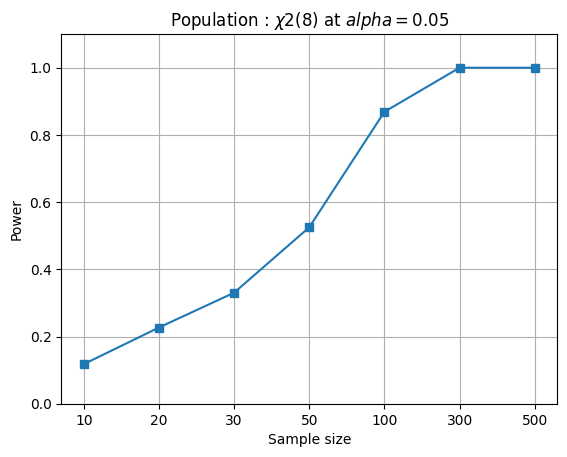

In [39]:
#  $\chi^2(8)$
n = [10,20,30,50,100,300,500] #樣本數
N = 50000 #實驗次數
alfa = 0.05
power = np.zeros(len(n))  

from scipy.stats import norm, skew, kurtosis,chi2,t,uniform
import numpy as np
def JB_test(x):
    n = x.shape[0]
    s1 = skew(x,bias=False)
    g1 = np.sqrt(n/6)*(s1)
    k1 = kurtosis(x,bias = False)
    g2 = np.sqrt(n/24)*(k1)
    stats = g1**2+g2**2
    p_value = 1-chi2.cdf(stats,df = 2)
    return stats, p_value
    
#-------------------------------- 使用迴圈計算不同驗本下的檢定力
for i in range(len(n)):
    x = chi2.rvs(df = 8, size = (n[i], N))
    stats, p_value = JB_test(x)
    power[i] = (p_value <= alfa).mean()
#---------------------------------畫圖
plt.plot(range(len(n)), power, marker = "s") 
plt.xticks(range(len(n)),n)    
plt.ylim(0, 1.1,  0.2)
plt.title("Population : $\chi2(8)$ at $alpha = 0.05 $") 
plt.xlabel("Sample size")
plt.ylabel("Power")
plt.grid()

- ### 結論
- 第一張圖為由常態分配所抽樣之檢定力，不論是樣本小或大，檢定力皆落於我們設定的 $\alpha$ 附近，當 $H_a$ 來自常態時（也就是資料來自 $H_0$ 的意思），此時的 Power 又稱為顯著水準，即此檢定統計量有維持住既定的顯著水準。
-  後續三種不同自由度的 T 分配，其中自由度為3時，隨著樣本增大檢定力最後高達 1，此即大樣本下檢定統計量 $G_3$ 能認出此分配確實不來自於常態，但是根據自由度的增加，檢定力卻越來越低，可觀察自由度高達 30 的 T 分配之檢定力相對低了許多，T 分配之自由度越高，分配會越趨近於常態，$G_3$ 檢定統計量就不容易看出是否來自常態，因為分配跟自己( 常態 )過於相像所以不易辨認。
- Uniform 分配的檢定力為一條水平線，不論樣本數為多少檢定力都固定。
- 卡方分配隨著樣本數的增加，就越容易辨認分配是否來自常態，檢定力也越高。